In [1]:
%run ~/relmapping/annot/notebooks/__init__.ipynb

/mnt/home3/jj374/anaconda36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


os.getcwd(): /mnt/beegfs/scratch_copy/ahringer/jj374/lab/relmapping


In [4]:
# Write .tsv file with all the columns
df_merged = pd.read_csv('annot/Fig1D1_accessible_sites/Fig1D1_accessible_sites.tsv', sep='\t')
#print('%s accessible sites' % (yp.f_uk(len(df_merged)),))
df_merged.head()

,chrom,start,end,atac_peak_accessibility,atac_source,atac_wt_emb_height,atac_wt_l1_height,atac_wt_l2_height,atac_wt_l3_height,atac_wt_l4_height,atac_wt_ya_height,atac_glp1_d1_height,atac_glp1_d2_height,atac_glp1_d6_height,atac_glp1_d9_height,atac_glp1_d13_height
0,chrI,1900,2051,1975,atac_wt_se,1.487219,1.436852,1.234831,1.476625,1.180041,3.028015,0.984149,0.912876,1.155934,1.187989,1.661203
1,chrI,3826,3977,3901,atac_wt_pe,67.202148,58.451061,74.416000,133.738358,179.794342,211.372787,88.025909,69.674324,68.506355,64.593590,55.413097
2,chrI,4276,4427,4351,atac_wt_se,1.581892,2.656172,2.186598,3.502825,5.871352,7.771934,1.802739,1.327403,1.547550,2.069787,1.901336
3,chrI,11272,11423,11347,atac_wt_pe,2.606371,4.443353,9.830266,10.700469,11.683004,13.928377,20.864365,16.739265,17.585819,15.858321,17.019400
4,chrI,13070,13221,13145,atac_wt_pe,5.557951,3.608833,3.977978,3.398183,2.689872,2.953438,2.047788,2.084701,1.994170,2.586042,3.367910


In [7]:
#l_ = list(sorted(set(config['stages_rep'] + list(config['atac808'].keys()))))
l_ = techreps_collapse(config['atac814'].keys())
for stage in itertools.islice(l_, None):
    print(stage)
    step = 'tg_se.bwa_se.rm_unmapped.rm_chrM.rm_blacklist.rm_q10.macs2_se_extsize150_shiftm75_keepdup_all'
    fp_ = pf('atac814_%(stage)s' % locals(), step, '_treat_pileup.bw', 'atac814')
    print(os.path.isfile(fp_))
    df_merged['atac_%(stage)s_height' % locals()] = list(map(np.nanmean, yp.read_regions(fp_, df_merged.chrom.tolist(), df_merged.start.tolist(), df_merged.end.tolist())))

glp1_d13_rep1
True
glp1_d13_rep2
True
glp1_d1_rep1
True
glp1_d1_rep2
True
glp1_d2_rep1
True
glp1_d2_rep2
True
glp1_d6_rep1
True
glp1_d6_rep2
True
glp1_d9_rep1
True
glp1_d9_rep2
True
wt_emb_rep1
True
wt_emb_rep2
True
wt_l1_rep1
True
wt_l1_rep2
True
wt_l2_rep1
True
wt_l2_rep2
True
wt_l3_rep1
True
wt_l3_rep2
True
wt_l4_rep1
True
wt_l4_rep2
True
wt_ya_rep1
True
wt_ya_rep2
True


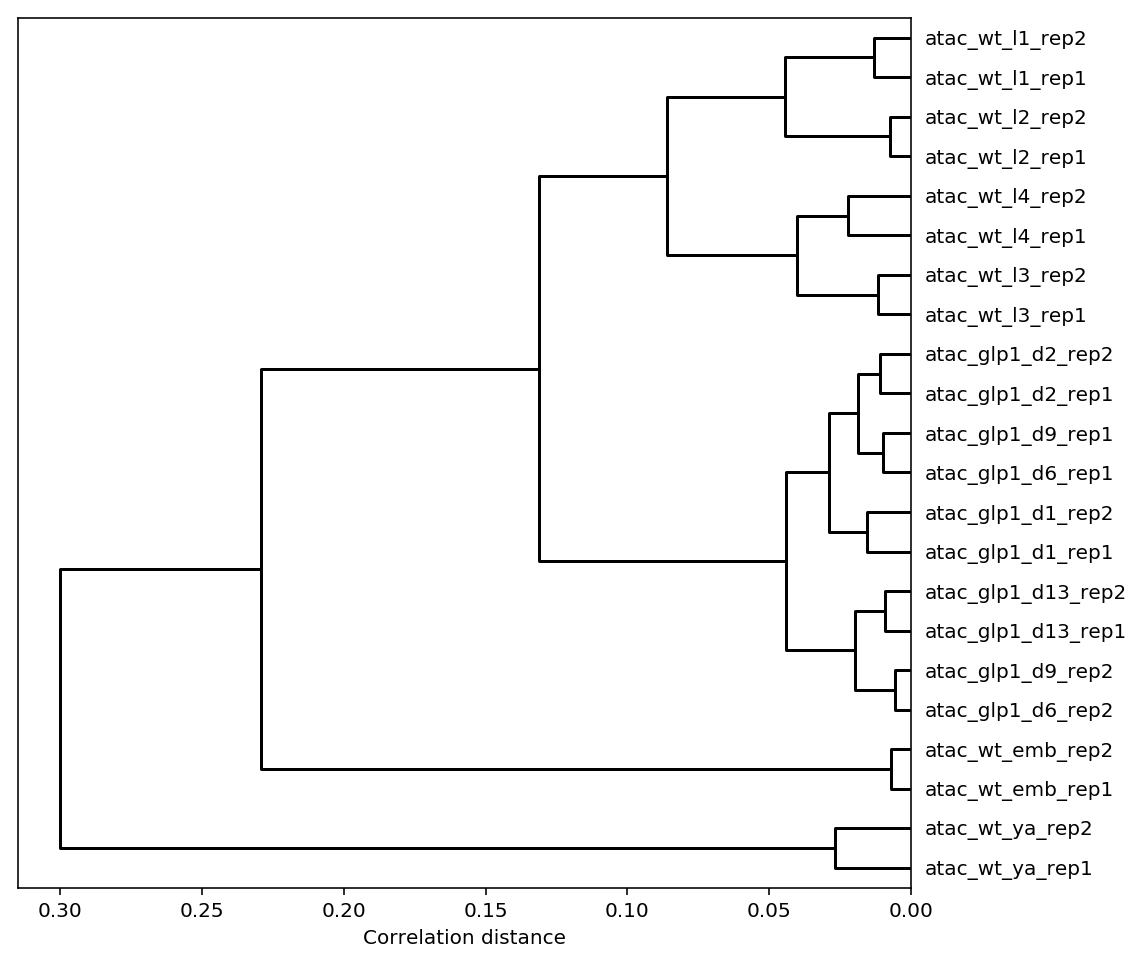

In [9]:
df_merged['atac_max_height'] = df_merged[['atac_%(stage)s_height' % locals() for stage in l_]].max(axis=1)
df_merged['atac_max_rank'] = df_merged['atac_max_height'].rank(ascending=False)

#.query('(0 <= atac_max_rank) & (atac_max_rank <= 10000)')
counts_ = df_merged[['atac_%s_height' % (ll,) for ll in l_]].values.T
linkage_matrix = sp.cluster.hierarchy.linkage(counts_, metric='correlation', method='complete')
plt.figure(figsize=(8,8))
r=sp.cluster.hierarchy.dendrogram(linkage_matrix, labels=['atac_%s' % (ll,) for ll in l_], orientation='left', 
                                  color_threshold=-1.0, above_threshold_color='k')
plt.gca().set_xlabel('Correlation distance')
plt.savefig('annot/FigA_clustering/reproducibility_atac.pdf', bbox_inches='tight')

In [ ]:
#counts_ = df_merged[['atac_%s_height' % (ll,) for ll in l_]].values.T
#linkage_matrix = sp.cluster.hierarchy.linkage(np.nan_to_num(counts_), metric='correlation', method='complete')
#plt.figure(figsize=(8,24))
#r=sp.cluster.hierarchy.dendrogram(linkage_matrix, labels=['atac_%s_height' % (ll,) for ll in l_], orientation='left', 
#                                  color_threshold=-1.0, above_threshold_color='k', leaf_font_size=11)
#plt.gca().set_xlabel('Correlation distance')
#plt.savefig('annot/FigA_clustering/reproducibility_atac_all.pdf', bbox_inches='tight')

In [ ]:
l_glp1_ = [
    'glp1_d6_rep1a',
    'glp1_d6_rep1b',
    'glp1_d6_rep1c',
    'glp1_d6_rep2',
    'glp1_d9_rep1a',
    'glp1_d9_rep1b',
    'glp1_d9_rep1c',
    'glp1_d9_rep2',
]

counts_ = df_merged[['atac_%s_height' % (ll,) for ll in l_glp1_]].values.T
linkage_matrix = sp.cluster.hierarchy.linkage(np.nan_to_num(counts_), metric='correlation')
plt.figure(figsize=(8,8))
r=sp.cluster.hierarchy.dendrogram(linkage_matrix, labels=['atac_%s_height' % (ll,) for ll in l_glp1_], orientation='left', 
                                  color_threshold=-1.0, above_threshold_color='k')
plt.gca().set_xlabel('Correlation distance')
#plt.savefig('annot/FigA_clustering/reproducibility_atac_d6_d9.pdf', bbox_inches='tight')

In [ ]:
df_regl = regl_addons()

In [ ]:
df_prom = pd.read_csv('annot/S2_regulatory_annotation/S2b_promoter_annotation_6Dec17.tsv', sep='\t')
#df_prom

In [ ]:
#sorted(set(config['stages_rep'] + list(config['atac808'].keys())))
l_atac_glp1 = [
    'glp1_d1_rep1',
    'glp1_d1_rep1a',
    'glp1_d1_rep1b',
    'glp1_d1_rep1c',
    'glp1_d1_rep2',
    'glp1_d1_rep2a',
    'glp1_d1_rep2b',
    'glp1_d2_rep1',
    'glp1_d2_rep1a',
    'glp1_d2_rep1b',
    'glp1_d2_rep1c',
    'glp1_d2_rep2',
    'glp1_d2_rep2a',
    'glp1_d2_rep2b',
    'glp1_d2_rep2c',
    'glp1_d6_rep1',
    'glp1_d6_rep1a',
    'glp1_d6_rep1b',
    'glp1_d6_rep1c',
    'glp1_d6_rep2',
    'glp1_d9_rep1',
    'glp1_d9_rep1a',
    'glp1_d9_rep1b',
    'glp1_d9_rep1c',
    'glp1_d9_rep2',
    'glp1_d13_rep1',
    'glp1_d13_rep1a',
    'glp1_d13_rep1b',
    'glp1_d13_rep1c',
    'glp1_d13_rep1d',
    'glp1_d13_rep1e',
    'glp1_d13_rep1f',
    'glp1_d13_rep2',
    'glp1_d13_rep2a',
    'glp1_d13_rep2b',
    'glp1_d13_rep2c',
]

for atac_glp1 in itertools.islice(l_atac_glp1, None):
    print(atac_glp1)
    step = 'tg_se.bwa_se.rm_unmapped.rm_chrM.rm_blacklist.rm_q10.macs2_se_extsize150_shiftm75_keepdup_all'
    fp_ = pf('atac808_%(atac_glp1)s' % locals(), step, '_treat_pileup.bw', 'atac808')
    print(os.path.isfile(fp_))
    df_prom[atac_glp1] = list(map(np.nanmean, yp.read_regions(fp_, df_prom.chrom.tolist(), df_prom.start.tolist(), df_prom.end.tolist())))
    

In [ ]:
l_lcap_glp1 = [
    'glp1_d1_rep1',
    'glp1_d1_rep2',
    'glp1_d2_rep1',
    'glp1_d2_rep2',
    'glp1_d6_rep1',
    'glp1_d6_rep2',
    'glp1_d9_rep1',
    'glp1_d9_rep2',
    'glp1_d13_rep1',
    'glp1_d13_rep2',
]

l_lcap_df = []
for lcap_glp1 in itertools.islice(l_lcap_glp1, None):
    print(lcap_glp1)
    step = 'trim20.bwa_pe.rm_unmapped_pe.rm_chrM.rm_rRNA_broad.rm_blacklist.rm_q10.htseq_counts'
    fp_ = pf('lcap808_%(lcap_glp1)s' % locals(), step, '.tsv', 'lcap808')
    print(os.path.isfile(fp_))
    l_lcap_df.append(pd.read_csv(fp_, sep='\t', names=['gene_id', 'lcap_' + lcap_glp1], index_col='gene_id'))

df_lcap = pd.concat(l_lcap_df, axis=1)

In [ ]:
df_join = df_prom.merge(df_lcap, left_on='gene_id', right_index=True)

In [ ]:
df__ = collections.OrderedDict()
for atac_glp1 in itertools.islice(l_atac_glp1, None):
    df__[atac_glp1] = collections.OrderedDict()
    for lcap_glp1 in itertools.islice(l_lcap_glp1, None):
        corr_ = sp.stats.spearmanr(df_join[atac_glp1], df_join['lcap_' + lcap_glp1]).correlation
        #print(atac_glp1, 'lcap_' + lcap_glp1, corr_)
        df__[atac_glp1]['lcap_' + lcap_glp1] = corr_

pd.DataFrame.from_dict(df__, orient='index')[[
    'lcap_glp1_d6_rep1',
    'lcap_glp1_d6_rep2',
    'lcap_glp1_d9_rep1',
    'lcap_glp1_d9_rep2',
    'lcap_glp1_d13_rep1',
    'lcap_glp1_d13_rep2',
]]

In [ ]:
#df_merged['atac_max_height'] = df_merged[['atac_%(stage)s_height' % locals() for stage in config['stages_rep']]].max(axis=1)
#df_merged['atac_max_rank'] = df_merged['atac_max_height'].rank(ascending=False)

#.query('(0 <= atac_max_rank) & (atac_max_rank <= 10000)')
counts_ = df_join[l_atac_glp1].values.T
linkage_matrix = sp.cluster.hierarchy.linkage(counts_, metric='correlation', method='complete')
plt.figure(figsize=(8,8))
r=sp.cluster.hierarchy.dendrogram(linkage_matrix, labels=df_join[l_atac_glp1].columns, orientation='left', 
                                  color_threshold=-1.0, above_threshold_color='k')
plt.gca().set_xlabel('Correlation distance')
#plt.savefig('annot/FigA_clustering/reproducibility_atac.pdf', bbox_inches='tight')